## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import shap
shap.initjs()
from lime.lime_tabular import LimeTabularExplainer

## Load saved Job

In [2]:
# load saved joblib file
loaded_joblib = joblib.load('best-models.joblib')

# check
loaded_joblib.keys()

dict_keys(['preprocessor', 'X_train', 'X_test', 'y_train', 'y_test', 'LinearRegression', 'RandomForestRegressor'])

In [3]:
# save variables
X_train_df = loaded_joblib['X_train']
y_train = loaded_joblib['y_train']
X_test_df = loaded_joblib['X_test']
y_test = loaded_joblib['y_test']
preprocessor = loaded_joblib['preprocessor']
lin_reg = loaded_joblib['LinearRegression']
rf = loaded_joblib['RandomForestRegressor']

## SHAP Global Explanation (Random Forest Model)

Create an X_shap and y_shap variable from your training data (use shap.sample as needed).

Create a model explainer,

Calculate the shap values for your model.

Create a summary plot - with plot_type='bar':

In a Markdown cell below, display your saved feature importance image (that you used in your README) and compare the most important features according to SHAP vs. your original feature importances.
Are they the same features in both? If not, what's different?
Save your bar summary plot figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README).
Create a second summary plot - with plot_type='dot'

In a markdown cell, interpret the top 3 most important features and how they influence your model's predictions.
Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README).

# Prepare Data

In [4]:
# how many rows do we have in our training data?
len(X_train_df)

6392

In [5]:
# save 400 rows with shap.sample() from X_train_df and y_train
X_shap = shap.sample(X_train_df, 
                     nsamples = 400, 
                     random_state = 42)

y_shap = y_train.loc[X_shap.index]

# reset index for sampled data to match shap_values integer index
X_shap_with_index = X_shap.reset_index(drop = False)
y_shap_with_index = y_shap.reset_index(drop = False)
X_shap_with_index.rename(columns = {'index': 'original_index'}, inplace = True)
y_shap_with_index.rename(columns = {'index': 'original_index'}, inplace = True)

X_shap = X_shap.reset_index(drop = True)
y_shap = y_shap.reset_index(drop = True)

# check
display(X_shap_with_index.head())
display(y_shap_with_index.head())
display(X_shap.head())
display(y_shap.head())

original_index  Item_Weight  Item_Visibility  Item_MRP  \
0            2937        8.365         0.039811  191.3188   
1            6371        9.695         0.030414  221.3114   
2            3762       17.250         0.000000   37.5822   
3             419       19.000         0.027139  127.3336   
4            8475       18.600         0.080627   92.5436   

   Outlet_Establishment_Year  Item_Fat_Content_Low Fat  \
0                     1987.0                       0.0   
1                     2009.0                       0.0   
2                     1998.0                       1.0   
3                     2007.0                       1.0   
4                     1999.0                       1.0   

   Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
0                     0.0               0.0                  0.0   
1                     0.0               0.0                  0.0   
2                     0.0               0.0                  0.0   
3                     0.0               0.0                  0.0   
4                     0.0               0.0                  0.0   

   Item_Type_Canned  ...  Outlet_Identifier_OUT046  Outlet_Identifier_OUT049  \
0               0.0  ...                       0.0                       0.0   
1               0.0  ...                       0.0                       0.0   
2               0.0  ...                       0.0                       0.0   
3               0.0  ...                       0.0                       0.0   
4               0.0  ...                       0.0                       1.0   

   Outlet_Size_MISSING  Outlet_Size_Medium  Outlet_Size_Small  \
0                  0.0                 0.0                0.0   
1                  0.0                 1.0                0.0   
2                  1.0                 0.0                0.0   
3                  1.0                 0.0                0.0   
4                  0.0                 1.0                0.0   

   Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          1.0   
4                          1.0                          0.0   

   Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                            1.0                            0.0   
1                            0.0                            1.0   
2                            0.0                            0.0   
3                            1.0                            0.0   
4                            1.0                            0.0   

   Outlet_Type_Supermarket Type3  
0                            0.0  
1                            0.0  
2                            0.0  
3                            0.0  
4                            0.0  

[5 rows x 38 columns]

original_index  Item_Outlet_Sales
0            2937          2285.0256
1            6371          2217.1140
2            3762           196.4110
3             419          2940.1728
4            8475           378.1744

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0        8.365         0.039811  191.3188                     1987.0   
1        9.695         0.030414  221.3114                     2009.0   
2       17.250         0.000000   37.5822                     1998.0   
3       19.000         0.027139  127.3336                     2007.0   
4       18.600         0.080627   92.5436                     1999.0   

   Item_Fat_Content_Low Fat  Item_Type_Baking Goods  Item_Type_Breads  \
0                       0.0                     0.0               0.0   
1                       0.0                     0.0               0.0   
2                       1.0                     0.0               0.0   
3                       1.0                     0.0               0.0   
4                       1.0                     0.0               0.0   

   Item_Type_Breakfast  Item_Type_Canned  Item_Type_Dairy  ...  \
0                  0.0               0.0              0.0  ...   
1                  0.0               0.0              0.0  ...   
2                  0.0               0.0              0.0  ...   
3                  0.0               0.0              0.0  ...   
4                  0.0               0.0              0.0  ...   

   Outlet_Identifier_OUT046  Outlet_Identifier_OUT049  Outlet_Size_MISSING  \
0                       0.0                       0.0                  0.0   
1                       0.0                       0.0                  0.0   
2                       0.0                       0.0                  1.0   
3                       0.0                       0.0                  1.0   
4                       0.0                       1.0                  0.0   

   Outlet_Size_Medium  Outlet_Size_Small  Outlet_Location_Type_Tier 1  \
0                 0.0                0.0                          0.0   
1                 1.0                0.0                          0.0   
2                 0.0                0.0                          0.0   
3                 0.0                0.0                          0.0   
4                 1.0                0.0                          1.0   

   Outlet_Location_Type_Tier 2  Outlet_Type_Supermarket Type1  \
0                          0.0                            1.0   
1                          0.0                            0.0   
2                          0.0                            0.0   
3                          1.0                            1.0   
4                          0.0                            1.0   

   Outlet_Type_Supermarket Type2  Outlet_Type_Supermarket Type3  
0                            0.0                            0.0  
1                            1.0                            0.0  
2                            0.0                            0.0  
3                            0.0                            0.0  
4                            0.0                            0.0  

[5 rows x 37 columns]

0    2285.0256
1    2217.1140
2     196.4110
3    2940.1728
4     378.1744
Name: Item_Outlet_Sales, dtype: float64

## SHAP Explainer and Values

In [6]:
# create shap.explainers.Tree explainer
explainer = shap.Explainer(rf)

# check
explainer

In [7]:
# get shap values from explainer for training data
shap_values = explainer(X_shap, y_shap)

# check
type(shap_values)

shap._explanation.Explanation

In [8]:
# check shap_values in dataframe
pd.DataFrame(shap_values.values, columns = X_shap.columns)

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
0       0.838621         1.862463   784.038131                 -38.203081   
1       0.899916         5.063998  1173.750298                 264.656308   
2       0.046884         5.341438  -963.059282                 -82.381120   
3      -0.109549         2.649861  -233.545782                  29.421778   
4      -0.107281        -2.680027  -761.225460                 -26.651037   
..           ...              ...          ...                        ...   
395    -1.002759        -7.174101  -209.953861                 -27.730347   
396     0.283806         1.255277   541.895052                 -38.498292   
397     0.283806         1.953010   422.715486                 -37.671893   
398     0.304674         2.087873 -1391.684618                  26.343898   
399    -6.887962        35.411217  1631.763098                 -44.001766   

     Item_Fat_Content_Low Fat  Item_Type_Baking Goods  Item_Type_Breads  \
0                    0.328681                0.087182         -0.030623   
1                    0.459066                0.075416          0.002785   
2                   -0.164200                0.039158         -0.020372   
3                   -0.118411                0.028310          0.013495   
4                   -0.115149                0.075067          0.013776   
..                        ...                     ...               ...   
395                 -0.106888                0.028310          0.013000   
396                 -0.156108                0.007217          0.007866   
397                 -0.460720               -0.018266          0.021446   
398                  0.312437                0.018097          0.028639   
399                  0.991379                0.059619          0.195064   

     Item_Type_Breakfast  Item_Type_Canned  Item_Type_Dairy  ...  \
0              -0.293165         -0.064940         0.086790  ...   
1              -0.224379         -0.068228         0.092057  ...   
2              -0.088173         -0.085235         0.074685  ...   
3              -0.088173         -0.068223         0.117282  ...   
4              -0.088173         -0.247195         0.085491  ...   
..                   ...               ...              ...  ...   
395            -0.088173         -0.064936         0.113056  ...   
396            -0.290475         -0.068276         0.174449  ...   
397            -0.106901         -0.072361         0.135692  ...   
398            -0.088173         -0.088139         0.070907  ...   
399            -0.088173         -0.102803         0.145760  ...   

     Outlet_Identifier_OUT046  Outlet_Identifier_OUT049  Outlet_Size_MISSING  \
0                    0.186887                 -0.296054             0.133511   
1                    0.309606                 -0.030740             0.078355   
2                    0.109728                 -0.030740            -0.166456   
3                    0.186887                 -0.052452            -0.283633   
4                    0.186887                  0.253075             0.133511   
..                        ...                       ...                  ...   
395                  0.186887                 -0.052452            -0.283633   
396                 -0.764850                 -0.296054             0.133511   
397                 -0.764850                 -0.296054             0.133511   
398                  0.186887                 -0.052452             0.133511   
399                  1.691637                 -0.052452             1.321477   

     Outlet_Size_Medium  Outlet_Size_Small  Outlet_Location_Type_Tier 1  \
0            -20.810425                0.0                          0.0   
1            142.095590                0.0                          0.0   
2            -55.075783                0.0                          0.0   
3            -18.906873                0.0                          0.0   
4             20.541905   

## Bar Summary Plot

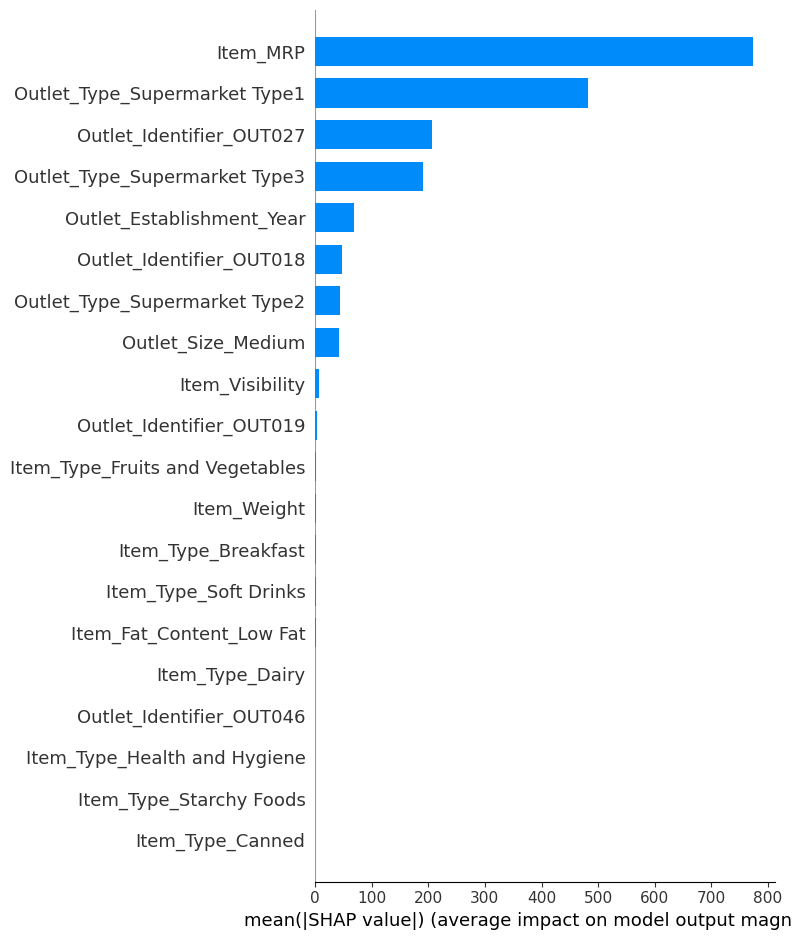

In [9]:
# plot and save
fig, ax = plt.subplots()
shap.summary_plot(shap_values, 
                 features = X_shap, 
                 plot_type = 'bar')
ax.set_title('Random Forest SHAP Summary Bar Plot')
fig.savefig('Images/shap_rf_bar_summary_plot.png',
           bbox_inches = 'tight');

The SHAP bar summary plot identified the same top five features that the random forest model relied on.

##  Dot Summary Plot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


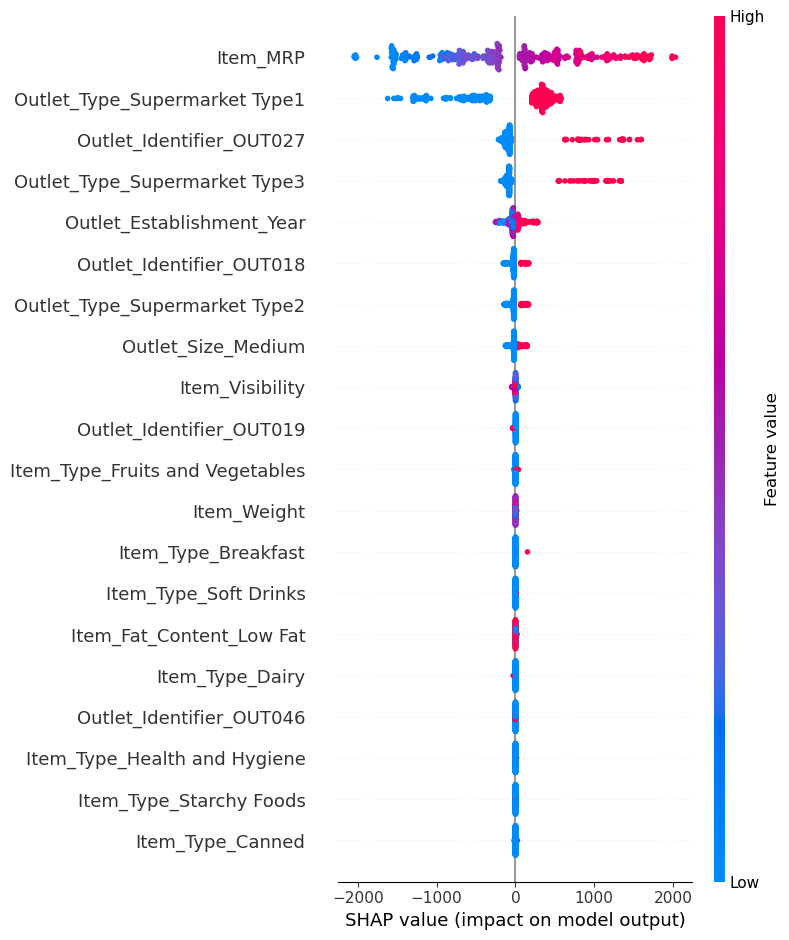

In [10]:
# plot and save
fig, ax = plt.subplots()
shap.summary_plot(shap_values, 
                 features = X_shap, 
                 plot_type = 'dot')
ax.set_title('Random Forest SHAP Summary Dot Plot')
fig.savefig('Images/shap_rf_dot_summary_plot.png',
           bbox_inches = 'tight');

The top three most important features identified by the SHAP dot plot above are:

'Item_MRP': High prices (identified in red) are driving the SHAP values for rows up, meaning that they are pushing up the total sales number in that row. The reverse is true for low prices (in blue). There looks to be a very orderly spread of high-, mid-, and low-value items directing the final sales.

'Outlet_Type_Supermarket Type1': The rows that belong to this categorical variable (in red) all show up on the positive side, meaning they are driving up final sales numbers. The rows that belong to other values in this category contribute to lower final sales.

'Outlet_Identifier_OUT027': This particular outlet, with rows identified in red, is associated with higher final sales. Other outlets have lower sales.

# Local Explanations

In this section we will pull out some individual rows and look at how our model treated them, for a more close-up view of our model.

The individual observations we will highlight with local explanations will be the rows with the highest residuals (differences between actual values and values predicted by the model). This will give us insight into our model because we will see why it was so off; this may help us uncover patterns or relationships that our model missed.

## Data

In [11]:
# calculate residuals for sample and save in df

y_pred = rf.predict(X_train_df.loc[X_shap_with_index['original_index']])
y = y_train.loc[y_shap_with_index['original_index']]
residuals = y - y_pred
residuals_df = pd.DataFrame({'Actual': y,
                            'Predicted': y_pred,
                            'Residual': residuals,
                            'Abs Residual': residuals.abs()})

display(residuals_df)

Actual    Predicted     Residual  Abs Residual
2937  2285.0256  3142.550597  -857.524997    857.524997
6371  2217.1140  3228.740379 -1011.626379   1011.626379
3762   196.4110   176.018188    20.392812     20.392812
419   2940.1728  2120.597199   819.575601    819.575601
8475   378.1744  1513.471025 -1135.296625   1135.296625
...         ...          ...          ...           ...
5381  2841.6344  2123.757486   717.876914    717.876914
4918  3175.8660  2864.997517   310.868483    310.868483
1299  2960.1468  2794.656689   165.490111    165.490111
8096  1163.8184   882.352561   281.465839    281.465839
2228   969.4048  4050.851433 -3081.446633   3081.446633

[400 rows x 4 columns]

In [12]:
# pull out two rows with largest residuals
top_2_rows = residuals_df.sort_values(by = 'Residual', ascending = False).head(2)
top_2_rows

Actual    Predicted     Residual  Abs Residual
4888  10256.6490  4183.645616  6073.003384   6073.003384
8245   7549.5062  4183.201169  3366.305031   3366.305031

In [13]:
# save index numbers of rows above
row1_original_index = top_2_rows.index[0]
row2_original_index = top_2_rows.index[1]

In [14]:
# get shap sample df index numbers for rows above
row1_sample_index = X_shap_with_index[X_shap_with_index['original_index'] == row1_original_index].index[0]
row2_sample_index = X_shap_with_index[X_shap_with_index['original_index'] == row2_original_index].index[0]

# check
display(row1_sample_index, row2_sample_index)

94

88

## LIME Tabular Explanations

In [15]:
# create lime explainer
lime_explainer = LimeTabularExplainer(training_data = X_shap.values,
                                     feature_names = X_shap.columns,
                                     mode = 'regression')

# check
lime_explainer

In [16]:
# create lime explainer
lime_explainer = LimeTabularExplainer(training_data = X_shap.values,
                                     feature_names = X_shap.columns,
                                     mode = 'regression')

# check
lime_explainer

In [17]:
# view lime explainer for row with largest residual
exp = lime_explainer.explain_instance(X_shap.iloc[row1_sample_index],
                                     rf.predict)
exp.show_in_notebook()

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


In [18]:
# see as list
exp_df = pd.DataFrame(exp.as_list(),columns=['Effect','Value'])
exp_df

Effect        Value
0                             Item_MRP > 183.59  1531.135652
1  0.00 < Outlet_Type_Supermarket Type1 <= 1.00  1439.056130
2              Outlet_Identifier_OUT027 <= 0.00 -1046.927905
3         Outlet_Type_Supermarket Type3 <= 0.00  -915.913441
4              Outlet_Identifier_OUT018 <= 0.00  -130.845991
5         Outlet_Type_Supermarket Type2 <= 0.00  -103.236904
6                     Item_Type_Seafood <= 0.00    93.327568
7                    Outlet_Size_Medium <= 0.00   -91.434328
8               Item_Type_Starchy Foods <= 0.00   -91.022002
9                      Item_Type_Canned <= 0.00   -86.148700

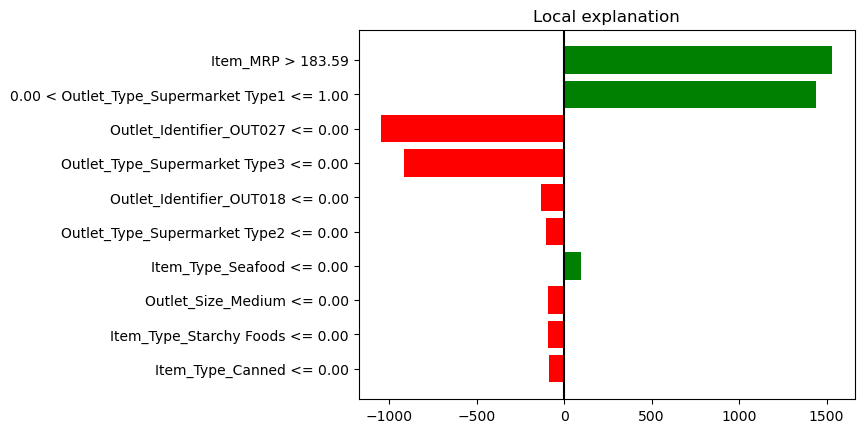

In [19]:
# see as barplot
fig = exp.as_pyplot_figure();
axes = fig.get_axes()
axes[0].axvline(0,color='k');

In [20]:
top_2_rows.iloc[[0]]

Actual    Predicted     Residual  Abs Residual
4888  10256.649  4183.645616  6073.003384   6073.003384

For this row, the model was off by about 6,073 rupees. The predicted sales were 4,183 rupees and the actual sales were 10,256 rupees. So the model predicted much lower than the actual value.

The features that brought the prediction down the most were 'Outlet_Identifier_OUT027' and 'Outlet_Type_Supermarket Type3'. Rows in those categorical features did have high sales, so our model thought that because this row did not belong to those categories, the sales would be relatively low. This warrants further investigation, as perhaps our model is relying on those features too much.

In [21]:
# view lime explainer for row with second-largest residual
exp = lime_explainer.explain_instance(X_shap.iloc[row2_sample_index],
                                     rf.predict)
exp.show_in_notebook()

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


In [22]:
# see as list
exp_df = pd.DataFrame(exp.as_list(),columns=['Effect','Value'])
exp_df

Effect        Value
0                             Item_MRP > 183.59  1537.281309
1  0.00 < Outlet_Type_Supermarket Type1 <= 1.00  1428.776302
2              Outlet_Identifier_OUT027 <= 0.00  -963.992034
3         Outlet_Type_Supermarket Type3 <= 0.00  -887.409904
4         Outlet_Type_Supermarket Type2 <= 0.00  -133.642957
5              Outlet_Identifier_OUT018 <= 0.00  -104.661321
6             0.00 < Outlet_Size_Medium <= 1.00    95.609550
7                       Item_Type_Dairy <= 0.00    66.664003
8          Item_Type_Health and Hygiene <= 0.00   -65.533826
9              Outlet_Identifier_OUT019 <= 0.00    64.687210

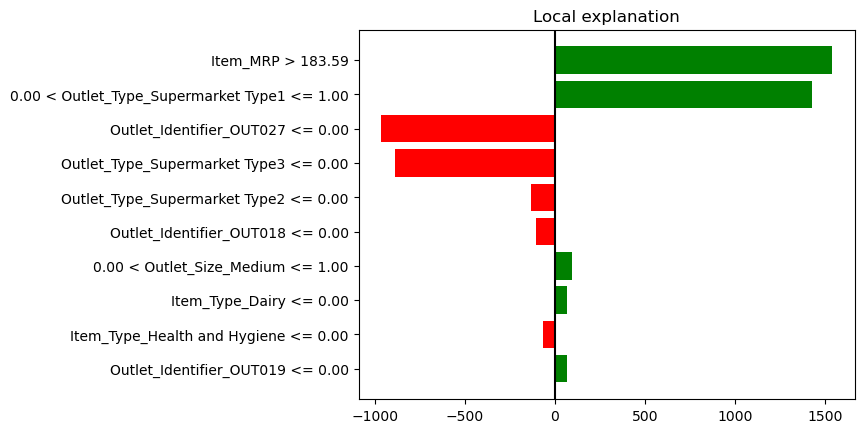

In [23]:
# see as barplot
fig = exp.as_pyplot_figure();
axes = fig.get_axes()
axes[0].axvline(0,color='k');

In [24]:
top_2_rows.iloc[[1]]

Actual    Predicted     Residual  Abs Residual
8245  7549.5062  4183.201169  3366.305031   3366.305031

For this row, the model again lowballed the sales, this time with a residual of about 3,366 rupees. The predicted sales were very similar to the first row above at 4,183 rupees, and the actual sales came out at 7,549 rupees.

Again, this row shows the same mistakes for the first row, indicating a possible pattern in our model worth further investigation. Because the row was not from Outlet 27 or a Supermarket Type 3, the model predicted low values.

Both rows investigated here have very similar-looking LIME tabular explanations.

## SHAP Individual Force Plots

In [25]:
# see features for row with largest residual
row = row1_sample_index
print(f"- Row #: {row}")
print(f"- Target: {y_shap.iloc[row]}")
X_shap.iloc[row].round(2)

- Row #: 94
- Target: 10256.649


Item_Weight                          14.85
Item_Visibility                       0.02
Item_MRP                            261.29
Outlet_Establishment_Year          1987.00
Item_Fat_Content_Low Fat              0.00
Item_Type_Baking Goods                0.00
Item_Type_Breads                      0.00
Item_Type_Breakfast                   0.00
Item_Type_Canned                      0.00
Item_Type_Dairy                       1.00
Item_Type_Frozen Foods                0.00
Item_Type_Fruits and Vegetables       0.00
Item_Type_Hard Drinks                 0.00
Item_Type_Health and Hygiene          0.00
Item_Type_Household                   0.00
Item_Type_Meat                        0.00
Item_Type_Seafood                     0.00
Item_Type_Snack Foods                 0.00
Item_Type_Soft Drinks                 0.00
Item_Type_Starchy Foods               0.00
Outlet_Identifier_OUT013              1.00
Outlet_Identifier_OUT017              0.00
Outlet_Identifier_OUT018              0.00
Outlet_Iden

In [26]:
# individual force plot for row with largest residual
shap.force_plot(explainer.expected_value,
               shap_values= shap_values[row1_sample_index].values,
               features=X_shap.iloc[row1_sample_index])

We can see in the force plot above, just as in the LIME tabular explanation above, that the two features pushing the model to make a higher prediction the most were the price of the item and belonging to a Supermarket Type 1.

In [27]:
# see features for row with largest residual
row = row2_sample_index
print(f"- Row #: {row}")
print(f"- Target: {y_shap.iloc[row]}")
X_shap.iloc[row].round(2)

- Row #: 88
- Target: 7549.5062


Item_Weight                          16.20
Item_Visibility                       0.04
Item_MRP                            260.33
Outlet_Establishment_Year          1999.00
Item_Fat_Content_Low Fat              1.00
Item_Type_Baking Goods                0.00
Item_Type_Breads                      0.00
Item_Type_Breakfast                   0.00
Item_Type_Canned                      0.00
Item_Type_Dairy                       0.00
Item_Type_Frozen Foods                0.00
Item_Type_Fruits and Vegetables       1.00
Item_Type_Hard Drinks                 0.00
Item_Type_Health and Hygiene          0.00
Item_Type_Household                   0.00
Item_Type_Meat                        0.00
Item_Type_Seafood                     0.00
Item_Type_Snack Foods                 0.00
Item_Type_Soft Drinks                 0.00
Item_Type_Starchy Foods               0.00
Outlet_Identifier_OUT013              0.00
Outlet_Identifier_OUT017              0.00
Outlet_Identifier_OUT018              0.00
Outlet_Iden

In [28]:
# individual force plot for row with second-largest residual
shap.force_plot(explainer.expected_value,
               shap_values= shap_values[row2_sample_index].values,
               features=X_shap.iloc[row2_sample_index])

The same explanation for the row above persists for this row. An interesting pattern we can see from these two examples is that they are both items from a Supermarket Type 1, with very similar prices (261 and 260 rupees, respectively). However, they differ in all other features.